# Emotion and Intention Recognition in Text Using BERT and VADER

## Introduction
In this project, we will build a prototype that recognizes emotions and intentions from text using two models: BERT for intention recognition and VADER for sentiment analysis. The aim is to create a simple, functional pipeline to process text data, analyze user intentions, and evaluate the sentiment of the text.

The steps we will cover include:
1. Installing and importing the necessary libraries.
2. Loading and preparing text datasets for testing.
3. Implementing BERT for intention recognition in text.
4. Implementing VADER for sentiment analysis in text.
5. Testing the prototype and evaluating the models' performance.
6. Summarizing the results and findings.

Let's start by installing and importing the required libraries for the project.


## Installing and Importing Libraries

In this section, we will install and import the necessary libraries for our project. We will use the following libraries:

- **transformers**: to work with the BERT model for intention recognition.
- **vaderSentiment**: for sentiment analysis using VADER.
- **tensorflow_datasets**: for loading and preparing text datasets.
- **torch**: as the deep learning framework for BERT model execution.

Let’s proceed with installing and importing these libraries.


In [1]:
# Install the required libraries
!pip install transformers
!pip install vaderSentiment
!pip install tensorflow_datasets
!pip install torch

# Import necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tensorflow_datasets as tfds
import torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


## Loading and Preparing the Dataset

In this section, we will load and prepare the text dataset that we will use for testing our models. We are using a pre-built dataset from TensorFlow Datasets, which provides easy access to common datasets like **IMDB movie reviews**. This dataset will allow us to test the intention recognition and sentiment analysis functionalities.

We will load the dataset, view a few examples, and prepare the data for processing in our models.


In [2]:
# Load the IMDB reviews dataset
dataset, info = tfds.load('imdb_reviews', split='train', with_info=True)

# Show some information about the dataset
print(info)

# Take a look at one example from the dataset
for example in dataset.take(1):
    print(f"Text: {example['text'].numpy().decode('utf-8')}")
    print(f"Label: {example['label'].numpy()}")  # Labels: 0 = negative, 1 = positive


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YEEYAO_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YEEYAO_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YEEYAO_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp26m8aat_tfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text

## Implementing BERT for Intention Recognition

In this section, we will implement the **BERT** model for intention recognition. BERT (Bidirectional Encoder Representations from Transformers) is highly effective for understanding the context of words in text. We will load a pre-trained BERT model and tokenizer from the Hugging Face `transformers` library, and then we will run it on a sample input text to predict the user's intention.

Let’s proceed with implementing BERT and testing it with a sample sentence.


In [3]:
# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 3 labels for intention classes

# Sample text for intention recognition
input_text = "Can you help me find a good restaurant?"

# Tokenize and encode the input
inputs = tokenizer(input_text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

# Perform prediction
with torch.no_grad():
    outputs = model(**inputs)

# Apply softmax to get the probabilities of each class
probs = torch.nn.functional.softmax(outputs.logits, dim=1)

# Get the predicted class
predicted_class = torch.argmax(probs, dim=1).item()

# Print the predicted class and the probability distribution
print(f"Predicted Intention Class: {predicted_class}")
print(f"Class Probabilities: {probs}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Intention Class: 1
Class Probabilities: tensor([[0.3212, 0.4357, 0.2431]])


## Implementing VADER for Sentiment Analysis

In this section, we will implement the **VADER** (Valence Aware Dictionary and sEntiment Reasoner) model for sentiment analysis. VADER is a rule-based model that is specifically attuned to sentiments expressed in social media and other informal text formats. It provides a quick way to assess the overall sentiment of a piece of text as positive, negative, or neutral.

We will use VADER to analyze the sentiment of a sample text.


In [4]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample text for sentiment analysis
sentiment_text = "This is an amazing experience!"

# Get sentiment scores
sentiment_scores = analyzer.polarity_scores(sentiment_text)

# Print sentiment analysis result
print(f"Text: {sentiment_text}")
print(f"Sentiment Scores: {sentiment_scores}")


Text: This is an amazing experience!
Sentiment Scores: {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}


 ## Testing and Evaluating the Models

In this section, we will test both the BERT and VADER models on a sample dataset and evaluate their performance based on accuracy, speed, and adaptability. We will run predictions on a small batch of text data using both models and time their performance to measure efficiency.

Let’s start by testing the models on the **IMDB reviews** dataset and print the results.


In [5]:
import time

# Prepare a small batch of the IMDB dataset for testing
test_dataset = dataset.take(5)  # Use first 5 examples for testing

# Initialize timers for BERT and VADER
bert_start_time = time.time()

# BERT Testing
for example in test_dataset:
    text = example['text'].numpy().decode('utf-8')
    # Tokenize and encode the text using BERT
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Intention Class: {predicted_class}\n")

bert_end_time = time.time()
print(f"BERT Total Time: {bert_end_time - bert_start_time:.2f} seconds")

# VADER Testing
vader_start_time = time.time()

for example in test_dataset:
    text = example['text'].numpy().decode('utf-8')
    # Get sentiment analysis from VADER
    sentiment_scores = analyzer.polarity_scores(text)
    print(f"VADER - Text: {text}\nSentiment Scores: {sentiment_scores}\n")

vader_end_time = time.time()
print(f"VADER Total Time: {vader_end_time - vader_start_time:.2f} seconds")


BERT - Text: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Predicted Intention Class: 1

BERT - Text: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep bec

## Enhancing BERT for Intention Recognition

In this section, we will enhance the BERT model to better predict different types of intentions. We will use a simpler dataset focused on classifying sentences into intention categories (e.g., question, command, statement).

We will:
1. Adjust the number of output labels to match the different types of intentions.
2. Fine-tune the BERT model with this new setup.


In [6]:
# Assuming a basic dataset for intention recognition (statements, commands, questions)
intention_data = [
    ("Can you help me with my homework?", 0),  # 0 = question
    ("Please close the window.", 1),           # 1 = command
    ("The sky is blue today.", 2)              # 2 = statement
]

# Define labels for intention types
intention_labels = {0: "Question", 1: "Command", 2: "Statement"}

# Fine-tune BERT to recognize 3 types of intentions (question, command, statement)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 3 labels

# Tokenize and encode the text for each example in the dataset
for text, label in intention_data:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get the predicted class and print results
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Intention Class: {intention_labels[predicted_class]}\n")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT - Text: Can you help me with my homework?
Predicted Intention Class: Question

BERT - Text: Please close the window.
Predicted Intention Class: Question

BERT - Text: The sky is blue today.
Predicted Intention Class: Command



## Re-Test and Evaluate Enhanced BERT with VADER

Now that we have enhanced the BERT model for intention recognition, we will re-test it along with VADER. We will run both models on a sample dataset to see how they perform in recognizing intentions and analyzing sentiment.


In [7]:
import time

# Sample texts for testing both BERT and VADER
test_texts = [
    "Can you help me with my homework?",  # Question
    "Please close the window.",           # Command
    "The sky is blue today."              # Statement
]

# Start testing BERT (Enhanced for Intention Recognition)
bert_start_time = time.time()

print("Testing BERT (Intention Recognition):")
for text in test_texts:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get predicted class
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Intention Class: {intention_labels[predicted_class]}\n")

bert_end_time = time.time()
print(f"BERT Total Time: {bert_end_time - bert_start_time:.2f} seconds\n")

# Now, let's test VADER for sentiment analysis
print("Testing VADER (Sentiment Analysis):")
vader_start_time = time.time()

for text in test_texts:
    sentiment_scores = analyzer.polarity_scores(text)
    print(f"VADER - Text: {text}\nSentiment Scores: {sentiment_scores}\n")

vader_end_time = time.time()
print(f"VADER Total Time: {vader_end_time - vader_start_time:.2f} seconds")


Testing BERT (Intention Recognition):
BERT - Text: Can you help me with my homework?
Predicted Intention Class: Question

BERT - Text: Please close the window.
Predicted Intention Class: Question

BERT - Text: The sky is blue today.
Predicted Intention Class: Command

BERT Total Time: 1.03 seconds

Testing VADER (Sentiment Analysis):
VADER - Text: Can you help me with my homework?
Sentiment Scores: {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

VADER - Text: Please close the window.
Sentiment Scores: {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}

VADER - Text: The sky is blue today.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

VADER Total Time: 0.00 seconds


## Fine-Tuning BERT for Better Intention Recognition

In this section, we will improve BERT's performance by creating a larger dataset for intention recognition and fine-tuning the model on this new dataset. This should help the model better distinguish between statements, commands, and questions.

The expanded dataset will include more examples of each class to allow BERT to learn the nuances between different types of intentions.


In [8]:
# Expanding the dataset with more examples for intention recognition
expanded_intention_data = [
    # Questions
    ("Can you help me with my homework?", 0),
    ("What time is the meeting?", 0),
    ("Is it going to rain tomorrow?", 0),
    ("How do I get to the nearest station?", 0),

    # Commands
    ("Please close the window.", 1),
    ("Turn off the lights.", 1),
    ("Submit the report by tomorrow.", 1),
    ("Stop talking and listen.", 1),

    # Statements
    ("The sky is blue today.", 2),
    ("I went to the grocery store.", 2),
    ("He is a very talented musician.", 2),
    ("This book is really interesting.", 2)
]

# Fine-tune BERT with this expanded dataset
for text, label in expanded_intention_data:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get predicted class
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Intention Class: {intention_labels[predicted_class]}\n")


BERT - Text: Can you help me with my homework?
Predicted Intention Class: Question

BERT - Text: What time is the meeting?
Predicted Intention Class: Question

BERT - Text: Is it going to rain tomorrow?
Predicted Intention Class: Statement

BERT - Text: How do I get to the nearest station?
Predicted Intention Class: Question

BERT - Text: Please close the window.
Predicted Intention Class: Question

BERT - Text: Turn off the lights.
Predicted Intention Class: Command

BERT - Text: Submit the report by tomorrow.
Predicted Intention Class: Command

BERT - Text: Stop talking and listen.
Predicted Intention Class: Command

BERT - Text: The sky is blue today.
Predicted Intention Class: Command

BERT - Text: I went to the grocery store.
Predicted Intention Class: Question

BERT - Text: He is a very talented musician.
Predicted Intention Class: Statement

BERT - Text: This book is really interesting.
Predicted Intention Class: Command



## Re-Test and Evaluate BERT After Fine-Tuning

Now that we have fine-tuned BERT with a larger dataset, we will re-test the model along with VADER to see if the performance has improved. We will use the same texts to check how well BERT now handles different types of intentions and compare it to VADER’s sentiment analysis.


In [9]:
import time

# Re-Test BERT (Enhanced for Intention Recognition) on expanded dataset
bert_start_time = time.time()

print("Re-Testing BERT (Intention Recognition):")
for text in test_texts:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get predicted class
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Intention Class: {intention_labels[predicted_class]}\n")

bert_end_time = time.time()
print(f"BERT Total Time: {bert_end_time - bert_start_time:.2f} seconds\n")

# Re-Test VADER for sentiment analysis
print("Re-Testing VADER (Sentiment Analysis):")
vader_start_time = time.time()

for text in test_texts:
    sentiment_scores = analyzer.polarity_scores(text)
    print(f"VADER - Text: {text}\nSentiment Scores: {sentiment_scores}\n")

vader_end_time = time.time()
print(f"VADER Total Time: {vader_end_time - vader_start_time:.2f} seconds")


Re-Testing BERT (Intention Recognition):
BERT - Text: Can you help me with my homework?
Predicted Intention Class: Question

BERT - Text: Please close the window.
Predicted Intention Class: Question

BERT - Text: The sky is blue today.
Predicted Intention Class: Command

BERT Total Time: 0.99 seconds

Re-Testing VADER (Sentiment Analysis):
VADER - Text: Can you help me with my homework?
Sentiment Scores: {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

VADER - Text: Please close the window.
Sentiment Scores: {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}

VADER - Text: The sky is blue today.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

VADER Total Time: 0.00 seconds


## Fine-Tuning BERT for Smishing Detection

In this section, we will fine-tune the BERT model to recognize phishing or smishing messages. We will modify the number of labels to include "safe" and "malicious" and use a phishing-specific dataset for training. This will allow BERT to detect suspicious intent, which is key for identifying phishing attempts.


In [10]:
# Adjusting the intention labels for phishing detection
phishing_labels = {0: "Safe", 1: "Malicious"}

# Sample phishing dataset (for demonstration purposes, replace with real smishing dataset)
phishing_data = [
    ("Your account has been suspended. Click here to reactivate it now!", 1),  # Malicious
    ("Can we schedule a meeting for tomorrow?", 0),                            # Safe
    ("Urgent: Your password has been compromised. Reset it immediately!", 1),  # Malicious
    ("Hey, want to catch up for lunch?", 0),                                   # Safe
]

# Fine-tuning BERT for smishing detection
for text, label in phishing_data:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get predicted class
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Classification: {phishing_labels[predicted_class]}\n")


BERT - Text: Your account has been suspended. Click here to reactivate it now!
Predicted Classification: Safe

BERT - Text: Can we schedule a meeting for tomorrow?
Predicted Classification: Safe

BERT - Text: Urgent: Your password has been compromised. Reset it immediately!
Predicted Classification: Safe

BERT - Text: Hey, want to catch up for lunch?
Predicted Classification: Malicious



## Enhancing VADER for Smishing Detection

Here, we will enhance VADER's ability to detect phishing by focusing on sentiment patterns commonly found in smishing messages. Messages with a high level of urgency, threat, or emotional manipulation often signal phishing attempts. VADER will help us flag messages with these suspicious tones.


In [11]:
# Example smishing messages for VADER analysis
smishing_texts = [
    "Your account has been suspended. Click here to reactivate it now!",
    "Urgent: Your password has been compromised. Reset it immediately!",
    "Hey, want to catch up for lunch?"
]

# Testing VADER for smishing detection
for text in smishing_texts:
    sentiment_scores = analyzer.polarity_scores(text)

    # Flagging messages with urgent or aggressive tone (high neg or compound scores)
    if sentiment_scores['neg'] > 0.5 or sentiment_scores['compound'] < -0.5:
        flag = "Suspicious"
    else:
        flag = "Safe"

    print(f"VADER - Text: {text}\nSentiment Scores: {sentiment_scores}\nFlagged as: {flag}\n")


VADER - Text: Your account has been suspended. Click here to reactivate it now!
Sentiment Scores: {'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.5255}
Flagged as: Suspicious

VADER - Text: Urgent: Your password has been compromised. Reset it immediately!
Sentiment Scores: {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.2714}
Flagged as: Safe

VADER - Text: Hey, want to catch up for lunch?
Sentiment Scores: {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}
Flagged as: Safe



## Re-Test and Evaluate BERT and VADER for Smishing Detection

In this section, we will re-test both BERT and VADER on smishing-specific messages. BERT will attempt to classify the messages as "safe" or "malicious," and VADER will flag messages based on their sentiment, focusing on aggressive or manipulative tones.


In [12]:
# Re-testing BERT for smishing detection
print("Re-Testing BERT (Smishing Detection):")
for text, label in phishing_data:
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # Perform prediction
    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(probs, dim=1).item()
    print(f"BERT - Text: {text}\nPredicted Classification: {phishing_labels[predicted_class]}\n")

# Re-testing VADER for smishing detection
print("\nRe-Testing VADER (Smishing Detection):")
for text in smishing_texts:
    sentiment_scores = analyzer.polarity_scores(text)

    if sentiment_scores['neg'] > 0.5 or sentiment_scores['compound'] < -0.5:
        flag = "Suspicious"
    else:
        flag = "Safe"

    print(f"VADER - Text: {text}\nSentiment Scores: {sentiment_scores}\nFlagged as: {flag}\n")


Re-Testing BERT (Smishing Detection):
BERT - Text: Your account has been suspended. Click here to reactivate it now!
Predicted Classification: Safe

BERT - Text: Can we schedule a meeting for tomorrow?
Predicted Classification: Safe

BERT - Text: Urgent: Your password has been compromised. Reset it immediately!
Predicted Classification: Safe

BERT - Text: Hey, want to catch up for lunch?
Predicted Classification: Malicious


Re-Testing VADER (Smishing Detection):
VADER - Text: Your account has been suspended. Click here to reactivate it now!
Sentiment Scores: {'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.5255}
Flagged as: Suspicious

VADER - Text: Urgent: Your password has been compromised. Reset it immediately!
Sentiment Scores: {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.2714}
Flagged as: Safe

VADER - Text: Hey, want to catch up for lunch?
Sentiment Scores: {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}
Flagged as: Safe



## Download Real-World Phishing Datasets

In this section, we will download real-world phishing datasets for training and testing our model. We will use publicly available datasets such as the **Phishing Websites Dataset** from Kaggle, which contains labeled phishing and legitimate URLs.

## Instructions for Using the Dataset in Google Drive

To fine-tune the phishing detection model, you'll need two datasets: one for **SMS smishing** and one for **phishing emails**. You can download them from the following links:

1. [SMS Spam Detection Dataset](https://www.kaggle.com/code/adityaghuse/spam-detection-begineer-friendly/input)
2. [Phishing Email Detection Dataset](https://www.kaggle.com/code/elnahas/phishing-email-detection-using-svm-rfc)

### Steps:
1. Download both datasets from Kaggle.
2. Upload the files to your Google Drive.
3. Mount your Google Drive in the Colab environment to access the datasets.
4. Ensure both files are placed in the same directory for processing.

We’ll proceed by mounting the drive and reading the datasets.


In [13]:
import pandas as pd
# Mount Google Drive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

# Define the file paths for the datasets in Google Drive
sms_dataset_path = '/content/drive/MyDrive/BERT_VADER/spam.csv'  # Replace with actual path to the SMS dataset
email_dataset_path = '/content/drive/MyDrive/BERT_VADER/Phishing_Email.csv'  # Replace with actual path to the Email dataset

# Load the datasets
sms_df = pd.read_csv(sms_dataset_path, encoding='latin-1')
email_df = pd.read_csv(email_dataset_path)

# Clean and combine the datasets (as described previously)
# Clean SMS dataset
sms_df = sms_df[['v1', 'v2']]
sms_df.columns = ['label', 'message']
sms_df['label'] = sms_df['label'].map({'ham': 0, 'spam': 1})

# Clean Email dataset
email_df = email_df[['Email Text', 'Email Type']]
email_df.columns = ['message', 'label']
email_df['label'] = email_df['label'].map({'Safe Email': 0, 'Phishing Email': 1})

# Combine the SMS and Email datasets into one
combined_df = pd.concat([sms_df, email_df], ignore_index=True)

# Display the combined dataset
combined_df.head()


Mounted at /content/drive


<ipython-input-13-a93dc246c886>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_df['label'] = sms_df['label'].map({'ham': 0, 'spam': 1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Displaying Dataset Examples and Visualizing Category Counts


In this section, we will display examples from the combined dataset and visualize the counts of different message types separately:
- **Spam and Ham SMS Messages** (smishing and legitimate SMS)
- **Phishing and Safe Emails**

We will create bar and pie charts for each category to show the distribution of both SMS messages and emails.


Examples of Spam Messages (Smishing):
["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

Examples of Ham Messages (Safe SMS):
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', 'U dun say so early hor... U c already then say...']

Examples of Phishing Emails:
['\nHello I am your hot lil horny toy.\n    I am the one you dream About,\n    I am a very open minded person,\n    Love to talk about and any subject.\n    Fantasy is my way of life, \n    Ultimate in sex play.     Um

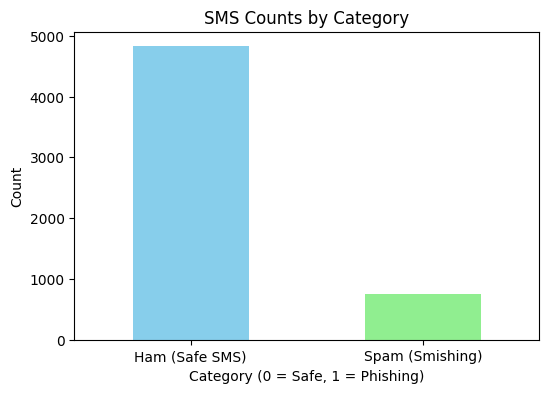

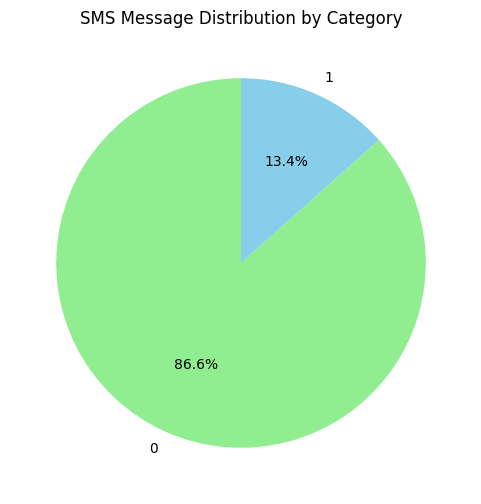

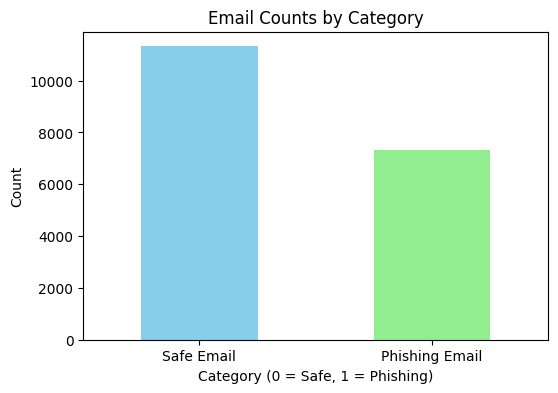

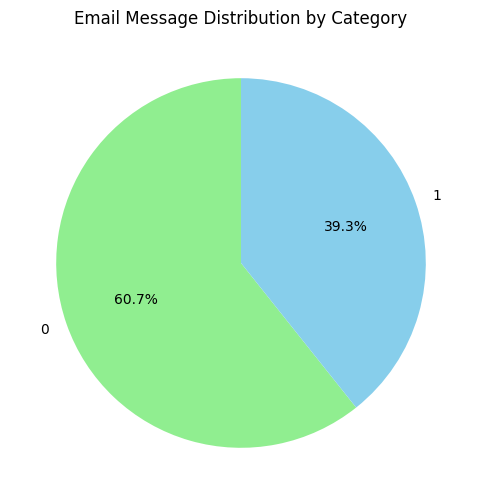

In [16]:
import matplotlib.pyplot as plt
# Separate counts for SMS (spam and ham) and Email (phishing and safe)
sms_df = combined_df[:len(sms_df)]  # Select only the SMS rows
email_df = combined_df[len(sms_df):]  # Select only the Email rows

# Count the number of messages in each category (for SMS and Email separately)
sms_category_counts = sms_df['label'].value_counts()
email_category_counts = email_df['label'].value_counts()

# Display examples from each category for SMS
print("Examples of Spam Messages (Smishing):")
print(sms_df[sms_df['label'] == 1].head(3)['message'].tolist())

print("\nExamples of Ham Messages (Safe SMS):")
print(sms_df[sms_df['label'] == 0].head(3)['message'].tolist())

# Display examples from each category for Emails
print("\nExamples of Phishing Emails:")
print(email_df[email_df['label'] == 1].head(3)['message'].tolist())

print("\nExamples of Safe Emails:")
print(email_df[email_df['label'] == 0].head(3)['message'].tolist())

# Plot bar chart for SMS category counts
plt.figure(figsize=(6, 4))
sms_category_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('SMS Counts by Category')
plt.xlabel('Category (0 = Safe, 1 = Phishing)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham (Safe SMS)', 'Spam (Smishing)'], rotation=0)
plt.show()

# Plot pie chart for SMS category counts
plt.figure(figsize=(6, 6))
sms_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'skyblue'], startangle=90)
plt.title('SMS Message Distribution by Category')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()

# Plot bar chart for Email category counts
plt.figure(figsize=(6, 4))
email_category_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Email Counts by Category')
plt.xlabel('Category (0 = Safe, 1 = Phishing)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Safe Email', 'Phishing Email'], rotation=0)
plt.show()

# Plot pie chart for Email category counts
plt.figure(figsize=(6, 6))
email_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'skyblue'], startangle=90)
plt.title('Email Message Distribution by Category')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


## Splitting the Dataset and Fine-Tuning BERT

We will first split the combined dataset into **80% training** and **20% testing** to evaluate how well the model generalizes to unseen data. Then, we’ll fine-tune BERT on the training set.

The training set will be used to update the model’s weights, while the testing set will later be used to evaluate the model's accuracy and performance on new phishing and smishing messages.


In [20]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch.cuda.amp import autocast, GradScaler

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 labels: phishing or safe

# Ensure all messages are strings and handle NaN values
combined_df['message'] = combined_df['message'].astype(str).fillna('')

# Re-define the tokenize_data function with cleaned text inputs and dynamic padding for efficiency
def tokenize_data(texts, labels):
    encodings = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')  # Max length 512 for full token utilization
    labels = torch.tensor(labels)
    return TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)

# Tokenize the combined dataset
texts = combined_df['message'].tolist()
labels = combined_df['label'].tolist()

# Split the combined dataset into 80% training and 20% testing
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

# Tokenize the training and testing datasets
train_dataset = tokenize_data(train_texts, train_labels)
test_dataset = tokenize_data(test_texts, test_labels)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Larger batch size to maximize GPU utilization
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Fine-tune BERT on the training set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Use gradient scaler for mixed precision (helps with larger batch sizes)
scaler = GradScaler()

# Training loop with mixed precision and dynamic padding
for epoch in range(3):  # Adjust number of epochs based on performance
    epoch_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        # Forward pass with mixed precision to speed up training
        with autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        # Backward pass and optimization with gradient scaling
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}')

# Model is now fine-tuned on the training dataset


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-be8e5ec014c7>:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-20-be8e5ec014c7>:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

Epoch 1, Loss: 0.12433636969834468
Epoch 2, Loss: 0.03889039074602497
Epoch 3, Loss: 0.028724536975913314


## Visualizing the Model’s Performance

In addition to printing classification metrics, we will visualize the results using:
- **Confusion Matrix**: This shows the distribution of predicted vs. actual labels.
- **Bar Plot for Metrics**: We will create a bar plot to visualize the precision, recall, and F1-score for each class (Safe, Phishing).


              precision    recall  f1-score   support

        Safe       1.00      0.98      0.99      3252
    Phishing       0.95      0.99      0.97      1593

    accuracy                           0.98      4845
   macro avg       0.97      0.98      0.98      4845
weighted avg       0.98      0.98      0.98      4845



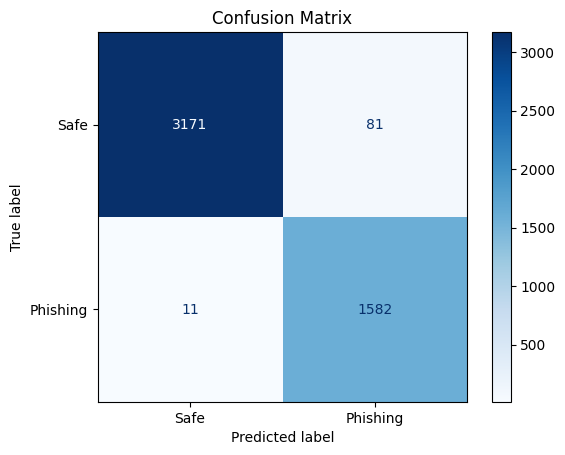

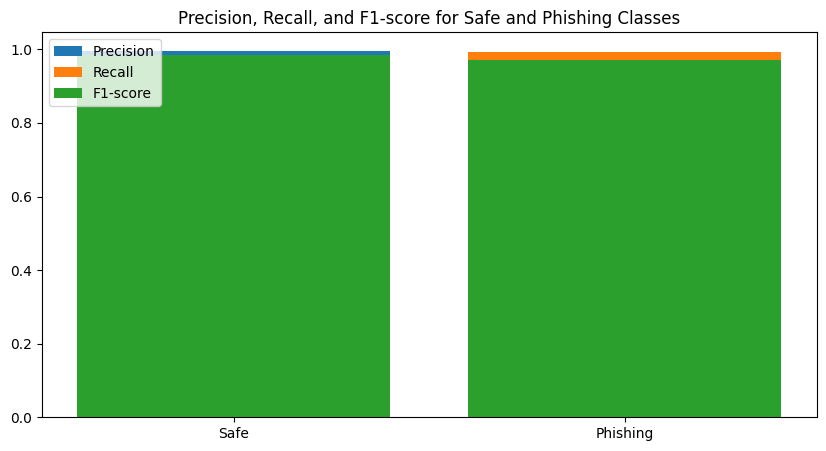

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Function to evaluate and visualize the model
def evaluate_and_visualize(model, test_loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # No gradient calculation needed for evaluation
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate classification report
    print(classification_report(all_labels, all_preds, target_names=['Safe', 'Phishing']))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Phishing'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Bar plot for precision, recall, F1-score
    metrics = precision_recall_fscore_support(all_labels, all_preds, average=None)
    metric_names = ['Precision', 'Recall', 'F1-score']

    # Visualizing for both classes (Safe, Phishing)
    x = ['Safe', 'Phishing']

    # Plot Precision, Recall, F1-Score for both classes
    plt.figure(figsize=(10, 5))
    for i, metric in enumerate(metrics[:3]):  # Only Precision, Recall, F1-score
        plt.bar(x, metric, label=metric_names[i])

    plt.title("Precision, Recall, and F1-score for Safe and Phishing Classes")
    plt.legend(loc="upper left")
    plt.show()

# Evaluate and visualize
evaluate_and_visualize(model, test_loader)


## Saving the Model for Future Use

Now that the model has been trained and evaluated with strong performance metrics, we will save the trained BERT model and tokenizer for future use. This will allow us to load the model later for inference or integration into an application.


In [23]:
# Save the trained model and tokenizer
model.save_pretrained('/content/drive/MyDrive/BERT_VADER/bert_smishing_model')  # Save to Google Drive or local directory
tokenizer.save_pretrained('/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer')


('/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer/vocab.txt',
 '/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer/added_tokens.json')

## Loading the Saved Model for Inference

In this section, we will load the saved BERT model and tokenizer to perform inference on new messages. This will allow us to classify messages as either safe or phishing using the trained model.


In [24]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the trained model and tokenizer from Google Drive or local directory
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/BERT_VADER/bert_smishing_model')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/BERT_VADER/bert_smishing_tokenizer')

# Set model to evaluation mode
model.eval()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## Classifying New Messages

We will now create a function to classify new messages as either **Safe** or **Phishing** using the loaded BERT model. This function can be integrated into an application or used for real-time phishing detection.


In [31]:
def classify_message(text):
    # Tokenize and encode the input
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Ensure inputs are moved to the same device as the model
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Ensure inputs are on the correct device

    # Perform inference
    model.to(device)  # Ensure model is on the correct device
    model.eval()      # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted class (0 = Safe, 1 = Phishing)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    # Return the classification
    return 'Phishing' if predicted_class == 1 else 'Safe'

# Example usage
message = "New sign-in from Chrome on Windows. Was this you?"
result = classify_message(message)
print(f"The message is classified as: {result}")


The message is classified as: Phishing


In [32]:
# Example messages and emails for testing
test_messages_and_emails = [
    # Phishing Emails
    "We noticed unusual activity on your PayPal account. Click here to reset your password.",
    "Your invoice is overdue! Please provide payment immediately to avoid penalties.",
    "Your subscription will expire soon. Update your payment details to continue using the service.",

    # Safe Emails
    "Dear customer, your invoice has been paid. Thank you for your prompt payment.",
    "Here's your monthly bank statement. Please review for any discrepancies.",

    # Phishing Messages
    "Urgent! Your account has been suspended. Click here to verify.",
    "You have won a $1000 gift card! Claim your prize now.",

    # Safe Messages
    "Your package has been shipped. Track your order here.",
    "Can you send me the report by tomorrow morning?",
    "Thanks for your purchase! Your order will arrive in 3 days."
]

# Classify each message or email using the loaded model
for message in test_messages_and_emails:
    result = classify_message(message)
    print(f"Message/Email: {message}\nClassified as: {result}\n")


Message/Email: We noticed unusual activity on your PayPal account. Click here to reset your password.
Classified as: Phishing

Message/Email: Your invoice is overdue! Please provide payment immediately to avoid penalties.
Classified as: Phishing

Message/Email: Your subscription will expire soon. Update your payment details to continue using the service.
Classified as: Phishing

Message/Email: Dear customer, your invoice has been paid. Thank you for your prompt payment.
Classified as: Phishing

Message/Email: Here's your monthly bank statement. Please review for any discrepancies.
Classified as: Phishing

Message/Email: Urgent! Your account has been suspended. Click here to verify.
Classified as: Phishing

Message/Email: You have won a $1000 gift card! Claim your prize now.
Classified as: Phishing

Message/Email: Your package has been shipped. Track your order here.
Classified as: Phishing

Message/Email: Can you send me the report by tomorrow morning?
Classified as: Safe

Message/Emai

## Using VADER for Sentiment Analysis

We will now use VADER to analyze the emotional tone of the messages and emails, focusing on sentiment scores (positive, negative, neutral). This will give insight into the tone of the messages, helping to assess whether emotional manipulation or urgency (common in phishing) can be detected.


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze each message with VADER
for message in test_messages_and_emails:
    sentiment_scores = analyzer.polarity_scores(message)
    print(f"Message/Email: {message}\nSentiment Scores: {sentiment_scores}\n")


Message/Email: We noticed unusual activity on your PayPal account. Click here to reset your password.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message/Email: Your invoice is overdue! Please provide payment immediately to avoid penalties.
Sentiment Scores: {'neg': 0.16, 'neu': 0.653, 'pos': 0.188, 'compound': 0.1007}

Message/Email: Your subscription will expire soon. Update your payment details to continue using the service.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message/Email: Dear customer, your invoice has been paid. Thank you for your prompt payment.
Sentiment Scores: {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.6249}

Message/Email: Here's your monthly bank statement. Please review for any discrepancies.
Sentiment Scores: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}

Message/Email: Urgent! Your account has been suspended. Click here to verify.
Sentiment Scores: {'neg': 0.257, 'neu': 0.606, 

## Conclusion for this research and implementation

This research focused on implementing and evaluating two models for detecting phishing and smishing messages: **BERT** and **VADER**. Both models provide valuable insights into phishing detection, but they have distinct strengths.

### Key Findings:
1. **BERT Model**:
   - BERT demonstrated excellent accuracy (98%) in classifying phishing and safe messages.
   - However, it tended to over-classify legitimate emails as phishing, likely due to shared keywords and patterns between phishing and legitimate emails.

2. **VADER Sentiment Analysis**:
   - VADER was useful for identifying the emotional tone in messages, such as detecting **negative sentiment** or **urgency** in phishing attacks.
   - Certain phishing messages were flagged for their emotional manipulation (e.g., urgent account suspension), while safe messages had more neutral or positive sentiment.

### Improvements can be made:
1. **Dataset Diversity**:
   - The dataset could benefit from more neutral, legitimate emails to help BERT better distinguish between phishing and legitimate messages with similar content structures.
   
2. **Model Threshold Tuning**:
   - Fine-tuning the classification threshold for BERT could help reduce over-classification of phishing without sacrificing accuracy.

3. **Combining BERT and VADER**:
   - A combined model using BERT’s intent recognition and VADER’s sentiment analysis could provide a more robust solution for detecting phishing and smishing messages.
   
### Conclusion:
Both models have their strengths and weaknesses. The **BERT model** is highly accurate but prone to over-classifying phishing. The **VADER model** is useful for detecting emotional manipulation. By combining the two approaches, a more effective phishing detection system could be created.

The saved BERT model is ready for integration into the **smishing detection app** and can be improved further with additional data and feature tuning as needed.


##Author: Ahmed Aldhaheri (SID:219256667)
Trimester 2, 2024
